In [1]:
import treecorr as tc
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

In [9]:
cmass = np.load('../catalogue/cmass_z_cut.npy')
random = np.load('../catalogue/cmass_random.npy')

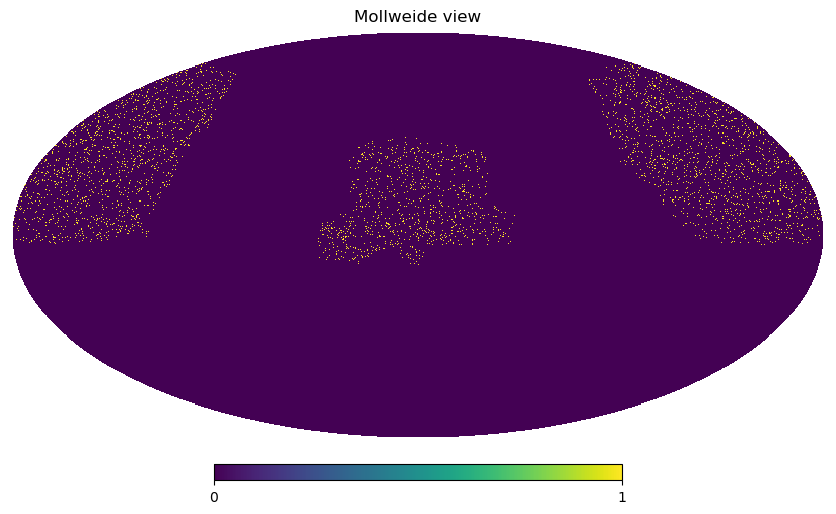

In [3]:
image = np.zeros(hp.nside2npix(2048))
image[hp.ang2pix(2048, np.deg2rad(90-cmass['dec']), np.deg2rad(cmass['ra']))] = 1
hp.mollview(image)

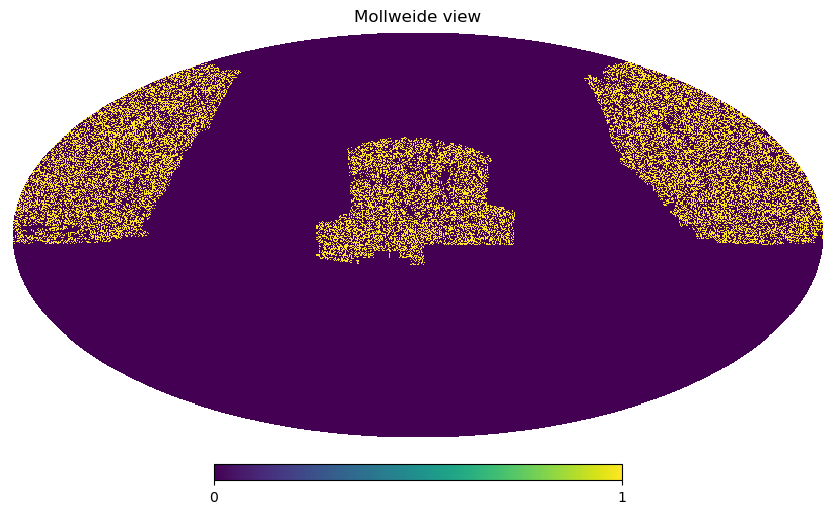

In [13]:
image = np.zeros(hp.nside2npix(2048))
image[hp.ang2pix(2048, np.deg2rad(90-random['dec']), np.deg2rad(random['ra']))] = 1
hp.mollview(image)

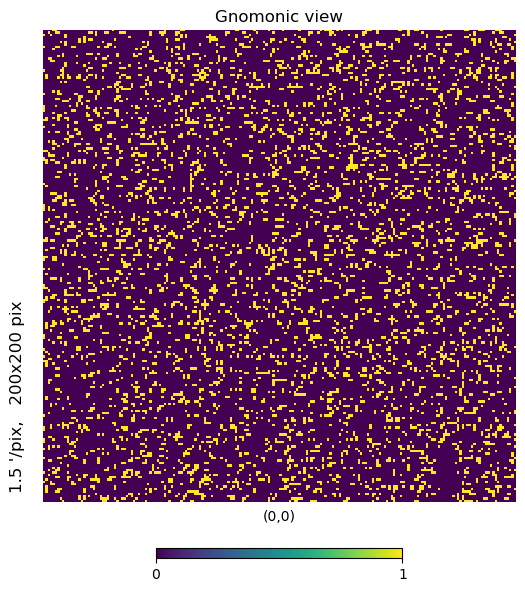

In [33]:
hp.visufunc.gnomview(image, rot=(0, 0, 0))

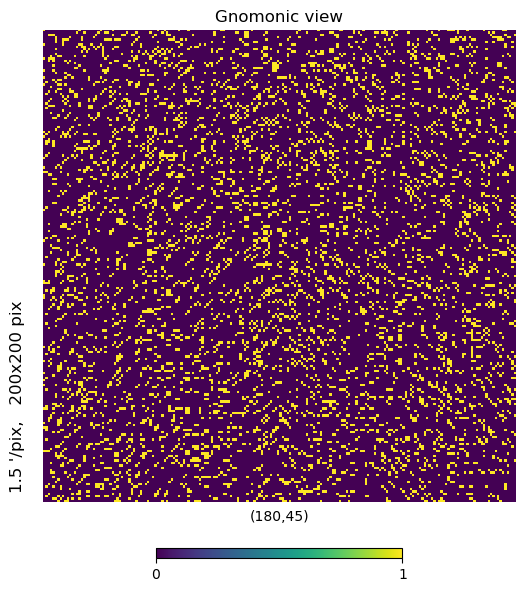

In [37]:
hp.visufunc.gnomview(image, rot=(180, 45, 0), min=0, max=1)

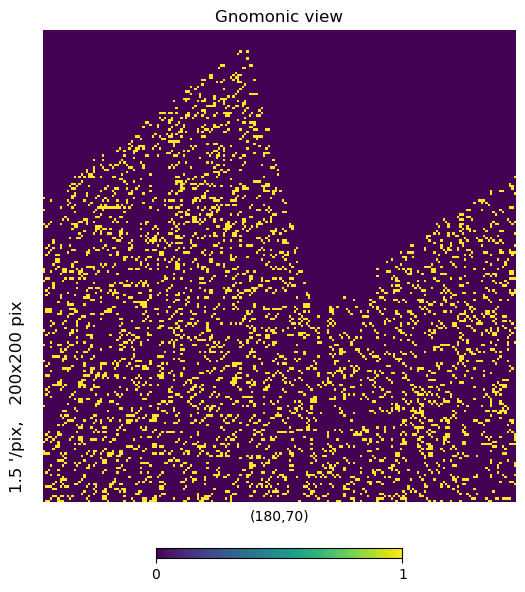

In [42]:
hp.visufunc.gnomview(image, rot=(180, 70, 0), min=0, max=1)

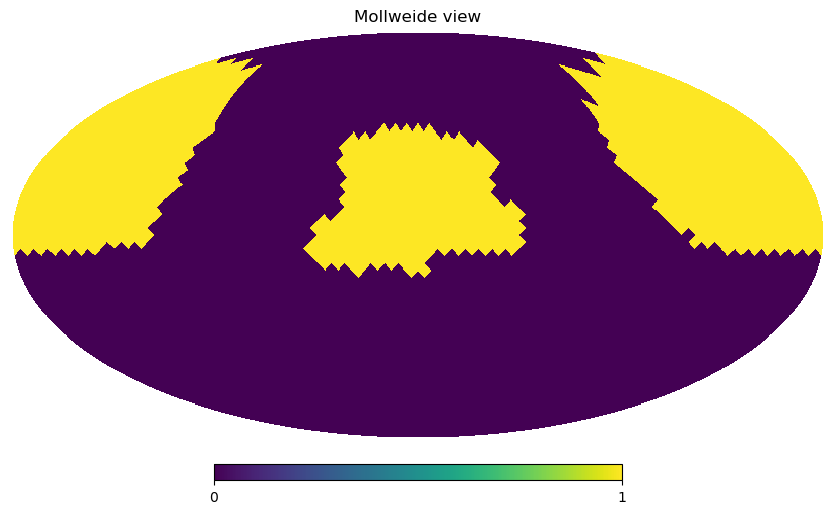

In [4]:
nside = 15
npix = hp.ang2pix(nside, np.deg2rad(90 - cmass['dec']), np.deg2rad(cmass['ra']))
image = np.zeros(hp.nside2npix(nside))
image[npix] = 1
hp.mollview(image)

In [5]:
npix = np.unique(npix)
mask = np.zeros(hp.nside2npix(nside), bool)
mask[npix] = True
random_theta = np.arccos(np.random.uniform(-1, 1, len(cmass)*30))
random_phi = np.random.uniform(0, np.pi*2, len(cmass)*30)
within_mask = mask[hp.ang2pix(nside, random_theta, random_phi)]

In [6]:
random_theta = random_theta[within_mask]
random_phi = random_phi[within_mask]

In [7]:
random = np.zeros(len(random_phi), dtype=cmass.dtype)
random['ra'] = np.rad2deg(random_phi)
random['dec'] = 90 - np.rad2deg(random_theta)
random['w'] = 1
random['z'] = np.random.choice(cmass['z'], len(random_phi))

In [8]:
np.save('../catalogue/random_cmass_test', random)